In [1]:
import os
from PIL import Image
import pytesseract
import cv2
from matplotlib import pyplot as plt
import re

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

bd Basia Sag ader quence

cS Unique Identification Authority of india

Sods a SS 2)
PIS_S2 ALIDIG, AS Szia, ged

Sra ges Sota QS Shia, aacid siae,

63a! - 762001

Address: i ae
C/O Subash Chandra Mahapatra, PRAKRUTI £ 2
BIHAR, PRAKRUTI BIHAR, PRAKRUTI ask

BIHAR, PRAKRUTI BIHAR, Phulabani Town,
Kandhamal,

Odisha - 762001

2 reipeuidaigovin | p> www.uidal.govin

TEXT:  bd Basia Sag ader quence new_line  new_line cS Unique Identification Authority of india new_line  new_line Sods a SS 2) new_line PIS_S2 ALIDIG, AS Szia, ged new_line  new_line Sra ges Sota QS Shia, aacid siae, new_line  new_line 63a! - 762001 new_line  new_line Address: i ae new_line C/O Subash Chandra Mahapatra, PRAKRUTI £ 2 new_line BIHAR, PRAKRUTI BIHAR, PRAKRUTI ask new_line  new_line BIHAR, PRAKRUTI BIHAR, Phulabani Town, new_line Kandhamal, new_line  new_line Odisha - 762001 new_line  new_line 2 reipeuidaigovin | p> www.uidal.govin new_line 


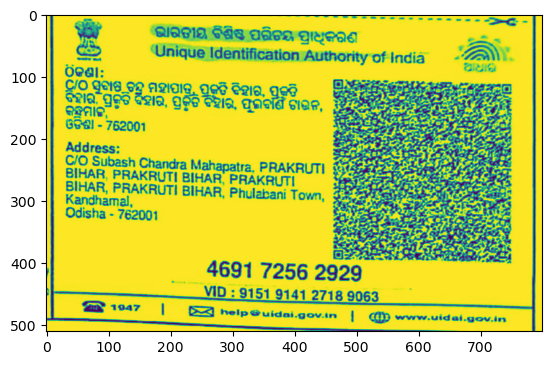

In [2]:
image = cv2.imread("../assets/aadhaar-back/bibhuti-back-aadhaar.jpg")
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Gaussian blur
blur = cv2.GaussianBlur(gray, (3, 3), 0)
# Otsu's threshold
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
current_processing_image = gray
# data = pytesseract.image_to_string(invert, lang="eng", config="--psm 6")
data = pytesseract.image_to_string(
    current_processing_image, lang="eng", config="--psm 4"
)
print(data)

text = data.replace("\n", " new_line ")
print("TEXT: ", text)
# Show image
plt.imshow(current_processing_image)

In [3]:
def extract_aadhaar_back(text):
    print(text)
    # init variables
    splitted_text = []
    address = None
    pincode = None

    for txt in text.split("new_line"):
        txt = txt.strip()
        if txt:
            splitted_text.append(txt)

    print("splitted text: ", splitted_text)
    print("\n-----------\n")

    if address is None:
        startIndx = None
        endIndx = None
        for item in splitted_text:
            pincode_match = re.search('[0-9]{6}', item)
            if pincode_match:
                endIndx = splitted_text.index(item)
                pincode = pincode_match.group(0)
                print(pincode)

            if "Address" in item:
                print(splitted_text.index(item))
                startIndx = splitted_text.index(item)

        print(startIndx, endIndx)
        address = splitted_text[startIndx:endIndx+1]
        if address:
            address = " ".join(address)
            indx = address.find('Address')
            address = address.replace('Address', '')
            address = address.replace(':', '')
            address = address.replace('-', '')
            address = address.replace(pincode, '')
            address = address[indx:]

        print(address.strip(), pincode)

extract_aadhaar_back(text)

bd Basia Sag ader quence new_line  new_line cS Unique Identification Authority of india new_line  new_line Sods a SS 2) new_line PIS_S2 ALIDIG, AS Szia, ged new_line  new_line Sra ges Sota QS Shia, aacid siae, new_line  new_line 63a! - 762001 new_line  new_line Address: i ae new_line C/O Subash Chandra Mahapatra, PRAKRUTI £ 2 new_line BIHAR, PRAKRUTI BIHAR, PRAKRUTI ask new_line  new_line BIHAR, PRAKRUTI BIHAR, Phulabani Town, new_line Kandhamal, new_line  new_line Odisha - 762001 new_line  new_line 2 reipeuidaigovin | p> www.uidal.govin new_line 
splitted text:  ['bd Basia Sag ader quence', 'cS Unique Identification Authority of india', 'Sods a SS 2)', 'PIS_S2 ALIDIG, AS Szia, ged', 'Sra ges Sota QS Shia, aacid siae,', '63a! - 762001', 'Address: i ae', 'C/O Subash Chandra Mahapatra, PRAKRUTI £ 2', 'BIHAR, PRAKRUTI BIHAR, PRAKRUTI ask', 'BIHAR, PRAKRUTI BIHAR, Phulabani Town,', 'Kandhamal,', 'Odisha - 762001', '2 reipeuidaigovin | p> www.uidal.govin']

-----------

762001
6
762001
6 11